<a href="https://colab.research.google.com/github/Mano2610/CE888/blob/Lab1/Assignment1/Tweet_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import urllib
import csv
import requests
import matplotlib.pyplot as plt
import string


# SENTIMENT DATASET:

In [2]:
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]
labels

['negative', 'neutral', 'positive']

# Reading and Writing the data's in a variable:

### Train Data:

In [3]:
train_text_url="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/train_text.txt"
train_label_url="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/train_labels.txt"

r = requests.get(train_text_url, allow_redirects=True)
open('train_text.txt', 'wb').write(r.content)

r1 = requests.get(train_label_url, allow_redirects=True)
open('train_labels.txt', 'wb').write(r1.content)

train_var=open("train_text.txt")
train_text_tweets=train_var.readlines()
train_var.close()

train_var1=open("train_labels.txt")
train_label_tweets=train_var1.readlines()
train_var1.close()


### Validation Data:

In [4]:
val_text_url="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/val_text.txt"
val_label_url="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/val_labels.txt"

r2 = requests.get(val_text_url, allow_redirects=True)
open('val_text.txt', 'wb').write(r2.content)

r3 = requests.get(val_label_url, allow_redirects=True)
open('val_labels.txt', 'wb').write(r3.content)

val_var=open("val_text.txt")
val_text_tweets=val_var.readlines()
val_var.close()

val_var1=open("val_labels.txt")
val_label_tweets=val_var1.readlines()
val_var1.close()


### Test Data:

In [5]:
test_text_url="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/test_text.txt"
test_label_url="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/sentiment/test_labels.txt"

r4 = requests.get(test_text_url, allow_redirects=True)
open('test_text.txt', 'wb').write(r4.content)

r5 = requests.get(test_label_url, allow_redirects=True)
open('test_labels.txt', 'wb').write(r5.content)

test_var=open("test_text.txt")
test_text_tweets=test_var.readlines()
test_var.close()

test_var1=open("test_labels.txt")
test_label_tweets=test_var1.readlines()
test_var1.close()

# Pre Processing the Data:

In [6]:
#function for preprocessing
def preprocess(tweets):
    for i in range(len(tweets)):
      if tweets[i].find('@user')!=-1:
        tweets[i]=re.sub('@user', '', tweets[i])
      if tweets[i].find('\n')!=-1:
        tweets[i]=re.sub('\n', '', tweets[i])

In [7]:
#preprocessing all the data

preprocess(train_text_tweets)
preprocess(train_label_tweets)
preprocess(val_text_tweets)
preprocess(val_label_tweets)
preprocess(test_text_tweets)
preprocess(test_label_tweets)

# Creating DataFrame :

In [8]:
#training dataframe
train_row=[]
train_Indices=[]
for i in range(len(train_text_tweets)):
  train_row.append({"TWEET":train_text_tweets[i], "LABEL":train_label_tweets[i]})
  train_Indices.append(i+1)
train_df=pd.DataFrame(train_row, index=train_Indices)

#validation dataframe
val_row=[]
val_Indices=[]
for i in range(len(val_text_tweets)):
  val_row.append({"TWEET":val_text_tweets[i], "LABEL":val_label_tweets[i]})
  val_Indices.append(i+1)
val_df=pd.DataFrame(val_row, index=val_Indices)

#test dataframe
test_row=[]
test_Indices=[]
for i in range(len(test_text_tweets)):
  test_row.append({"TWEET":test_text_tweets[i], "LABEL":test_label_tweets[i]})
  test_Indices.append(i+1)
test_df=pd.DataFrame(test_row, index=test_Indices)
  

# Filtering and Processing the Data:

In [9]:
train_df['TWEET'].unique()
train_df['TWEET']=train_df['TWEET'].apply(lambda x: x.lower())
train_df['TWEET']=train_df['TWEET'].apply(lambda x: re.sub('\w*\d\w*','', x))
train_df['TWEET']=train_df['TWEET'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
train_df['TWEET']=train_df['TWEET'].apply(lambda x: re.sub(' +',' ',x))

In [10]:
#Lemmatization
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
train_df['TWEET']=train_df['TWEET'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

train_df

,TWEET,LABEL
1,qt original draft book remus lupin survive bat...,2
2,ben smith smith concussion remain lineup thurs...,1
3,sorry bout stream night crash tonight sure min...,1
4,chase headleys rbi double inning david price s...,1
5,alciato bee invest million january summer pl...,2
...,...,...
45611,amazing beautiful lady gaga ac tonight love ...,2
45612,september arrive mean apple new iphone hour ...,2
45613,leeds sheff would giuseppe bellusci secure luf...,2
45614,be hilton head till lol jason aldean sept al...,1


# Analyzing and Visualizing the Labels:

<function matplotlib.pyplot.show>

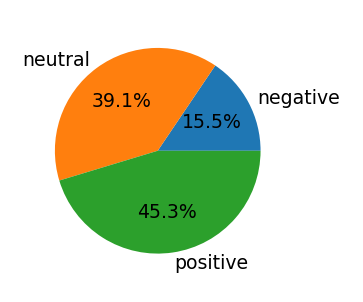

In [11]:
#train data:

data=train_df.LABEL.value_counts(sort=0)
plt.figure(figsize=(1.5,1.5), dpi=227)
plt.pie(data, labels=labels, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

<function matplotlib.pyplot.show>

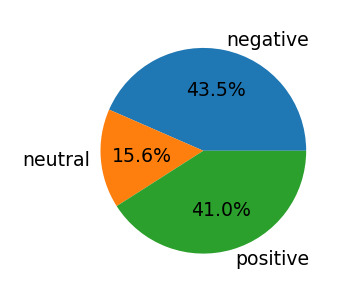

In [12]:
#val data:

data=val_df.LABEL.value_counts(sort=0)
plt.figure(figsize=(1.5,1.5), dpi=227)
plt.pie(data, labels=labels, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

<function matplotlib.pyplot.show>

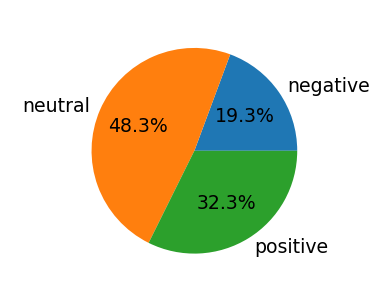

In [13]:
#test data:

data=test_df.LABEL.value_counts(sort=0)
plt.figure(figsize=(1.5,1.5), dpi=227)
plt.pie(data, labels=labels, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

In [14]:
df_grouped=train_df[['LABEL','TWEET']].groupby(by='LABEL').agg(lambda x:' '.join(x))
df_grouped

,TWEET
LABEL,
0,disappointed wwe summerslam want john cena win...
1,ben smith smith concussion remain lineup thurs...
2,qt original draft book remus lupin survive bat...


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['TWEET'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,aa,aaa,aaaa,aaaaaah,aaaaaahhhhh,aaaaaand,aaaaah,aaaaahhhhh,aaaaand,aaaah,aaaahhhh,aaaalllll,aaaggghhh,aaah,aaand,aaarrgghhhh,aaawwh,aac,aacta,aah,aahhh,aale,aalim,aaliyah,aaliyahs,aalllll,aameen,aami,aamir,aamiri,aamirkhan,aampe,aampm,aampserious,aaom,aap,aapl,aaptard,aapwithterrorist,aardwolf,...,zombies,zombieslayersunday,zomour,zon,zondag,zone,zoo,zooey,zooland,zoom,zootv,zop,zorro,zouma,zowie,zoya,zquad,zquadom,zquadwantszayntosmile,ztra,zubair,zubin,zubuchon,zuck,zuckerberg,zuckerman,zulu,zum,zuma,zumba,zumiez,zuoma,zurich,zvezda,zwei,zylona,zz,zzzz,zzzzzzzz,zzzzzzzzzz
LABEL,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,...,1,0,1,0,0,5,3,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,9,2,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,2,0,0,0,1,8,0,0,0,1,2,1,2,1,0,1,1,8,0,0,1,0,...,1,1,0,1,0,21,4,1,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,6,6,1,2,4,0,1,1,1,0,0,2,0,1,0
2,3,2,1,1,1,0,0,0,1,0,1,1,1,3,0,1,1,2,5,1,1,0,0,8,1,1,1,0,0,0,0,0,0,0,0,6,5,0,0,1,...,1,0,0,0,1,14,4,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,2,2,0,0,8,1,0,0,0,1,1,0,1,0,1


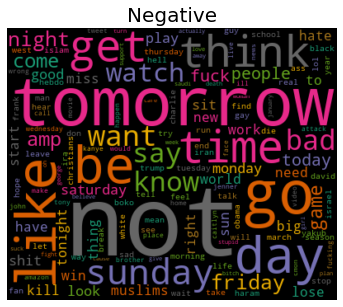

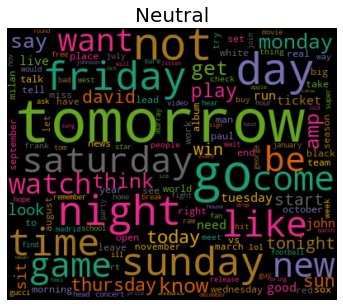

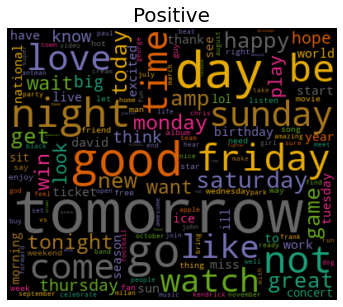

In [16]:
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(6,5))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  if title=='0':
    tit = "Negative"
  if title=='1':
    tit = "Neutral"
  if title=='2':
    tit = "Positive"
  plt.title('\n'.join(wrap(tit,60)),fontsize=20)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

# Creating and Training the Model:

In [17]:
!pip install tqdm

In [18]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
#using the exisitng model to train the data
model_args = ClassificationArgs(num_train_epochs=1, overwrite_output_dir=True, manual_seed=42)
model = ClassificationModel(model_type='xlnet', model_name='xlnet-base-cased', use_cuda=False, num_labels=3, args=model_args)


Downloading:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.weight', 'sequence_summary.summary.bias', 'logits_proj.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

In [19]:
train_df['LABEL'] = train_df['LABEL'].astype(int)
model.train_model(train_df[:100])


/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:446: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/13 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


(13, 1.0662868206317608)

# IRONY DATASET:

In [189]:

mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]
labels

['non_irony', 'irony']

# Reading and Writing the data's in a variable:

### Train Data:

In [190]:
train_text_url="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/train_text.txt"
train_label_url="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/train_labels.txt"

r = requests.get(train_text_url, allow_redirects=True)
open('train_text.txt', 'wb').write(r.content)

r1 = requests.get(train_label_url, allow_redirects=True)
open('train_labels.txt', 'wb').write(r1.content)

train_var=open("train_text.txt")
train_text_tweets=train_var.readlines()
train_var.close()

train_var1=open("train_labels.txt")
train_label_tweets=train_var1.readlines()
train_var1.close()


### Validation Data:

In [191]:
val_text_url="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/val_text.txt"
val_label_url="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/val_labels.txt"

r2 = requests.get(val_text_url, allow_redirects=True)
open('val_text.txt', 'wb').write(r2.content)

r3 = requests.get(val_label_url, allow_redirects=True)
open('val_labels.txt', 'wb').write(r3.content)

val_var=open("val_text.txt")
val_text_tweets=val_var.readlines()
val_var.close()

val_var1=open("val_labels.txt")
val_label_tweets=val_var1.readlines()
val_var1.close()


### Test Data:

In [192]:
test_text_url="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/test_text.txt"
test_label_url="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/irony/test_labels.txt"

r4 = requests.get(test_text_url, allow_redirects=True)
open('test_text.txt', 'wb').write(r4.content)

r5 = requests.get(test_label_url, allow_redirects=True)
open('test_labels.txt', 'wb').write(r5.content)

test_var=open("test_text.txt")
test_text_tweets=test_var.readlines()
test_var.close()

test_var1=open("test_labels.txt")
test_label_tweets=test_var1.readlines()
test_var1.close()

# Pre Processing the Data:

In [193]:
#function for preprocessing
def preprocess(tweets):
    for i in range(len(tweets)):
      if tweets[i].find('@user')!=-1:
        tweets[i]=re.sub('@user', '', tweets[i])
      if tweets[i].find('\n')!=-1:
        tweets[i]=re.sub('\n', '', tweets[i])

In [194]:
#preprocessing all the data

preprocess(train_text_tweets)
preprocess(train_label_tweets)
preprocess(val_text_tweets)
preprocess(val_label_tweets)
preprocess(test_text_tweets)
preprocess(test_label_tweets)

# Creating DataFrame :

In [195]:
#training dataframe
train_row=[]
train_Indices=[]
for i in range(len(train_text_tweets)):
  train_row.append({"TWEET":train_text_tweets[i], "LABEL":train_label_tweets[i]})
  train_Indices.append(i+1)
train_df=pd.DataFrame(train_row, index=train_Indices)

#validation dataframe
val_row=[]
val_Indices=[]
for i in range(len(val_text_tweets)):
  val_row.append({"TWEET":val_text_tweets[i], "LABEL":val_label_tweets[i]})
  val_Indices.append(i+1)
val_df=pd.DataFrame(val_row, index=val_Indices)

#test dataframe
test_row=[]
test_Indices=[]
for i in range(len(test_text_tweets)):
  test_row.append({"TWEET":test_text_tweets[i], "LABEL":test_label_tweets[i]})
  test_Indices.append(i+1)
test_df=pd.DataFrame(test_row, index=test_Indices)
  

# Filtering and Processing the Data:

In [196]:
train_df['TWEET'].unique()
train_df['TWEET']=train_df['TWEET'].apply(lambda x: x.lower())
train_df['TWEET']=train_df['TWEET'].apply(lambda x: re.sub('\w*\d\w*','', x))
train_df['TWEET']=train_df['TWEET'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
train_df['TWEET']=train_df['TWEET'].apply(lambda x: re.sub(' +',' ',x))

In [197]:
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
train_df['TWEET']=train_df['TWEET'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

train_df

,TWEET,LABEL
1,see ppl walk w crutch make excited week life,1
2,look girl broken smile ask want stay love 💕 🎵,0
3,remember buy book online servicewithasmile,1
4,band wear clothe karma,1
5,find etch sketch app oldschool notoldschool,1
...,...,...
2858,not respect beliefsi respect right atheist ath...,0
2859,woman get hit married manager crack hypocrite ...,1
2860,follow see post thot add onsorry,0
2861,not know be love product christmas heaven lo...,0


# Analyzing and Visualizing the Labels:

<function matplotlib.pyplot.show>

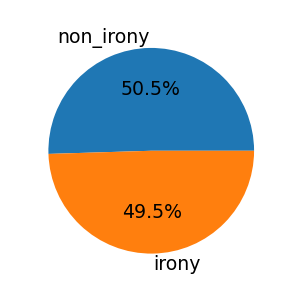

In [198]:
#train data:

data=train_df.LABEL.value_counts(sort=0)
plt.figure(figsize=(1.5,1.5), dpi=227)
plt.pie(data, labels=labels, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

<function matplotlib.pyplot.show>

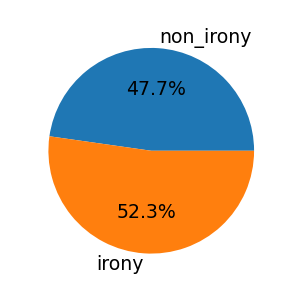

In [199]:
#val data:

data=val_df.LABEL.value_counts(sort=0)
plt.figure(figsize=(1.5,1.5), dpi=227)
plt.pie(data, labels=labels, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

<function matplotlib.pyplot.show>

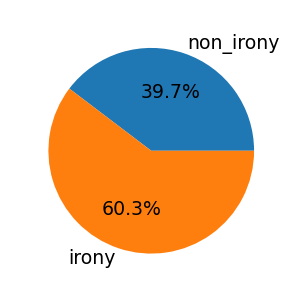

In [200]:
#test data:

data=test_df.LABEL.value_counts(sort=0)
plt.figure(figsize=(1.5,1.5), dpi=227)
plt.pie(data, labels=labels, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

In [201]:
df_grouped=train_df[['LABEL','TWEET']].groupby(by='LABEL').agg(lambda x:' '.join(x))
df_grouped

,TWEET
LABEL,
0,look girl broken smile ask want stay love 💕 🎵 ...
1,see ppl walk w crutch make excited week life r...


In [202]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['TWEET'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,aaaaaaaaand,aaaaaaandi,aaaaaamd,aaaaaand,aaaah,aaaawww,aaand,aaron,ab,abandon,abbas,abbreviation,abdullah,abe,abey,ability,able,ableg,aboutidpwddisability,absent,absolute,absolutefavs,absolutely,absolutetosh,abstract,abt,abuse,abuser,aca,academic,acatholicprayer,acc,accent,accept,acceptable,accepting,access,accessory,accidentally,accie,...,yoga,yogapant,yolo,york,yorke,youandibacktoyoutube,youareagenius,youaskedforit,youcanthearit,youk,youkili,youknowwhoyouare,young,youratruefriendtoher,yousee,youseehttptco,youthiacrasy,youtube,youu,yr,yrs,yrsin,yun,yung,yup,yuppy,yyj,zach,zampa,zealand,zebra,zen,zero,zimbabwe,zuckerberg,zzzz,ëœå,ïdepression,งวย,ｆｏｌｌｏｗ
LABEL,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,1,0,2,0,1,0,1,1,1,2,2,1,1,1,0,1,3,0,2,0,2,0,0,1,1,1,2,3,2,0,1,2,0,0,...,1,1,0,1,0,1,0,0,0,1,1,1,5,0,1,2,0,2,0,2,0,1,1,0,3,0,1,1,0,1,0,0,3,0,1,0,1,1,0,1
1,1,1,0,1,1,1,0,1,0,1,0,1,0,0,0,1,6,0,0,0,1,0,5,1,0,2,1,1,1,1,0,1,0,1,0,1,2,0,2,1,...,0,0,1,1,1,0,1,1,1,0,0,0,5,1,0,0,1,1,1,2,3,0,0,1,5,1,0,0,1,1,1,1,1,1,1,2,0,0,1,0


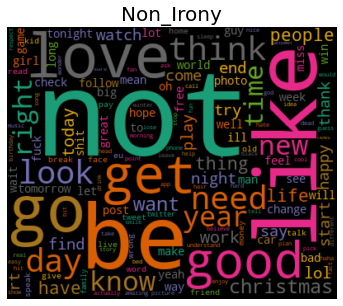

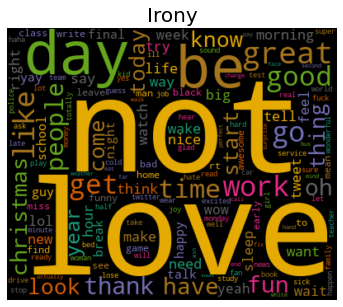

In [203]:
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(6,5))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  if title=='0':
    tit = "Non_Irony"
  if title=='1':
    tit = "Irony"
  plt.title('\n'.join(wrap(tit,60)),fontsize=20)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

# Creating and Training the Model:

In [204]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
#using the exisitng model to train the data
model_args = ClassificationArgs(num_train_epochs=1, overwrite_output_dir=True, manual_seed=42)
model = ClassificationModel(model_type='xlnet', model_name='xlnet-base-cased', use_cuda=False, num_labels=3, args=model_args)


Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.weight', 'sequence_summary.summary.bias', 'logits_proj.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [205]:
train_df['LABEL'] = train_df['LABEL'].astype(int)
model.train_model(train_df[:1000])


/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:446: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/125 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


(125, 0.7529930543899536)

# OFFENSIVE DATASET:

In [125]:
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]
labels

['not-offensive', 'offensive']

# Reading and Writing the data's in a variable:

### Train Data:

In [126]:
train_text_url="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/train_text.txt"
train_label_url="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/train_labels.txt"

r = requests.get(train_text_url, allow_redirects=True)
open('train_text.txt', 'wb').write(r.content)

r1 = requests.get(train_label_url, allow_redirects=True)
open('train_labels.txt', 'wb').write(r1.content)

train_var=open("train_text.txt")
train_text_tweets=train_var.readlines()
train_var.close()

train_var1=open("train_labels.txt")
train_label_tweets=train_var1.readlines()
train_var1.close()


### Validation Data:

In [127]:
val_text_url="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/val_text.txt"
val_label_url="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/val_labels.txt"

r2 = requests.get(val_text_url, allow_redirects=True)
open('val_text.txt', 'wb').write(r2.content)

r3 = requests.get(val_label_url, allow_redirects=True)
open('val_labels.txt', 'wb').write(r3.content)

val_var=open("val_text.txt")
val_text_tweets=val_var.readlines()
val_var.close()

val_var1=open("val_labels.txt")
val_label_tweets=val_var1.readlines()
val_var1.close()


### Test Data:

In [128]:
test_text_url="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/test_text.txt"
test_label_url="https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/offensive/test_labels.txt"

r4 = requests.get(test_text_url, allow_redirects=True)
open('test_text.txt', 'wb').write(r4.content)

r5 = requests.get(test_label_url, allow_redirects=True)
open('test_labels.txt', 'wb').write(r5.content)

test_var=open("test_text.txt")
test_text_tweets=test_var.readlines()
test_var.close()

test_var1=open("test_labels.txt")
test_label_tweets=test_var1.readlines()
test_var1.close()

# Pre Processing the Data:

In [129]:
#function for preprocessing
def preprocess(tweets):
    for i in range(len(tweets)):
      if tweets[i].find('@user')!=-1:
        tweets[i]=re.sub('@user', '', tweets[i])
      if tweets[i].find('\n')!=-1:
        tweets[i]=re.sub('\n', '', tweets[i])

In [130]:
#preprocessing all the data

preprocess(train_text_tweets)
preprocess(train_label_tweets)
preprocess(val_text_tweets)
preprocess(val_label_tweets)
preprocess(test_text_tweets)
preprocess(test_label_tweets)

# Creating DataFrame :

In [131]:
#training dataframe
train_row=[]
train_Indices=[]
for i in range(len(train_text_tweets)):
  train_row.append({"TWEET":train_text_tweets[i], "LABEL":train_label_tweets[i]})
  train_Indices.append(i+1)
train_df=pd.DataFrame(train_row, index=train_Indices)

#validation dataframe
val_row=[]
val_Indices=[]
for i in range(len(val_text_tweets)):
  val_row.append({"TWEET":val_text_tweets[i], "LABEL":val_label_tweets[i]})
  val_Indices.append(i+1)
val_df=pd.DataFrame(val_row, index=val_Indices)

#test dataframe
test_row=[]
test_Indices=[]
for i in range(len(test_text_tweets)):
  test_row.append({"TWEET":test_text_tweets[i], "LABEL":test_label_tweets[i]})
  test_Indices.append(i+1)
test_df=pd.DataFrame(test_row, index=test_Indices)
  

# Filtering and Processing the Data:

In [132]:
train_df['TWEET'].unique()
train_df['TWEET']=train_df['TWEET'].apply(lambda x: x.lower())
train_df['TWEET']=train_df['TWEET'].apply(lambda x: re.sub('\w*\d\w*','', x))
train_df['TWEET']=train_df['TWEET'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
train_df['TWEET']=train_df['TWEET'].apply(lambda x: re.sub(' +',' ',x))

In [133]:
#Lemmatization
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
train_df['TWEET']=train_df['TWEET'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

train_df

,TWEET,LABEL
1,bono care soon people understand gain follow...,0
2,year republicans deny obama pick breitbarter...,1
3,line help go to fine game go progress read b...,0
4,great hi fiona,0
5,parody unto certainly take heat anwell idiot...,1
...,...,...
11912,wonder sex traffic victim,1
11913,dare well nyjer,0
11914,idea sorry,0
11915,professor shoot self trump say gun control act...,0


# Analyzing and Visualizing the Labels:

<function matplotlib.pyplot.show>

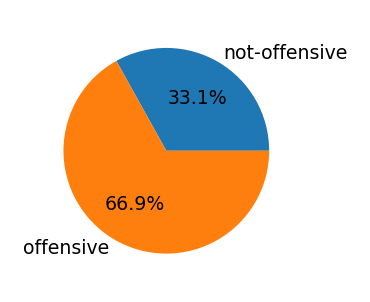

In [134]:
#train data:

data=train_df.LABEL.value_counts(sort=0)
plt.figure(figsize=(1.5,1.5), dpi=227)
plt.pie(data, labels=labels, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

<function matplotlib.pyplot.show>

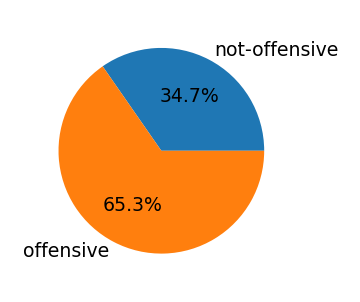

In [135]:
#val data:

data=val_df.LABEL.value_counts(sort=0)
plt.figure(figsize=(1.5,1.5), dpi=227)
plt.pie(data, labels=labels, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

<function matplotlib.pyplot.show>

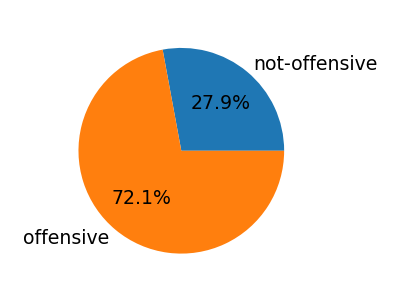

In [136]:
#test data:

data=test_df.LABEL.value_counts(sort=0)
plt.figure(figsize=(1.5,1.5), dpi=227)
plt.pie(data, labels=labels, textprops={'fontsize':6}, startangle=0, autopct='%1.1f%%')
plt.show

In [137]:
df_grouped=train_df[['LABEL','TWEET']].groupby(by='LABEL').agg(lambda x:' '.join(x))
df_grouped

,TWEET
LABEL,
0,bono care soon people understand gain follow...
1,year republicans deny obama pick breitbarter...


In [138]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['TWEET'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,aa,aaa,aaaaaaaaa,aaaah,aaaahh,aalayahi,aand,aaron,aarp,aasertion,ab,aba,ababzhah,aback,abandon,abbott,abc,abcnew,abet,abetterway,abhorrent,abi,abide,abiding,ability,abject,able,ableg,abnormal,aboard,aboilish,abolish,abolition,abominable,abomination,abort,abortion,abortionbecause,abortionnot,abortionwar,...,zealotry,zeckenbiss,zeland,zemkes,zena,zerin,zero,zeyal,ziggler,zim,zimmerman,zina,zion,zip,zipcode,zjail,zodiac,zoe,zog,zombie,zombifie,zone,zoom,zuckerberg,älskar,òne,ˢᵗᵉᵖ,ᴳᵉᵗᵗᶦⁿᵍ,ᴵⁿᵈᵉˣ,ᵗʰᵉ,ᶠᶦʳˢᵗ,ᶦˢ,ㅜㅡㅜ,너의존재가기적이야,더보이즈,현재,현재gt,𝓭𝔂𝓼𝓹𝓱𝓸𝓻𝓲𝓪,𝙼𝚌𝙿𝙾𝚄𝚃𝚂𝙵𝚊𝚌𝚎,𝙿𝚎𝚝𝚊𝚕𝚜
LABEL,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,0,1,1,1,1,3,1,1,3,1,1,1,2,1,0,1,1,1,0,1,10,1,5,1,35,1,0,3,0,2,1,1,0,2,22,1,1,1,...,1,1,1,1,0,1,12,1,1,2,0,1,1,0,1,0,0,2,0,3,1,14,0,2,1,1,1,1,1,1,1,1,1,2,1,3,2,0,1,1
1,1,0,1,0,0,0,0,3,0,0,1,0,0,0,0,2,3,0,0,0,3,0,10,1,2,0,15,0,1,0,1,2,0,0,1,2,18,0,0,0,...,0,0,0,0,1,0,20,0,0,0,3,0,0,1,0,1,1,0,1,4,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


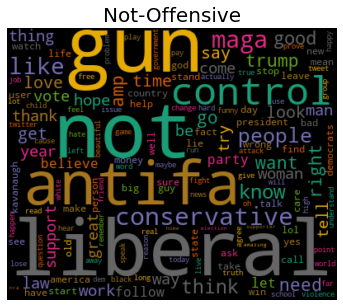

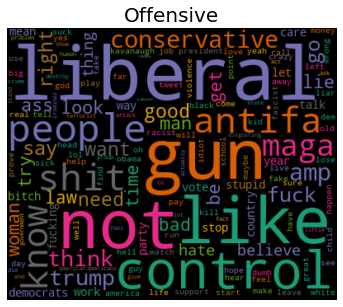

In [139]:
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(6,5))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  if title=='0':
    tit = "Not-Offensive"
  if title=='1':
    tit = "Offensive"
  plt.title('\n'.join(wrap(tit,60)),fontsize=20)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

# Creating and Training the Model:

In [170]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
#using the exisitng model to train the data
model_args = ClassificationArgs(num_train_epochs=1, overwrite_output_dir=True, manual_seed=42)
model = ClassificationModel(model_type='xlnet', model_name='xlnet-base-cased', use_cuda=False, num_labels=3, args=model_args)


Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.weight', 'sequence_summary.summary.bias', 'logits_proj.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [171]:
train_df['LABEL'] = train_df['LABEL'].astype(int)
model.train_model(train_df[:1000])


/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:446: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/125 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


(125, 0.6883720945119858)